# Giới thiệu

Trước khi vào nội dung chính thì em có câu chuyện muốn kể, chuyện là hôm qua nhóm em sau khi hoàn thành deadline 'khá khoai' thì chúng em quyết định thưởng cho bản thân 1 trận bóng chuyền. Ấy nhưng sau khi bạn Lâm mới từ ngoài vào bảo `hôm nay không chơi được đâu` và thế là cả nhóm hủy cuộc chơi. Ủa tại sao vậy? Đúng vậy Lâm đã có cái nhìn xa, thấy gió bắt đầu se lạnh, độ ẩm giảm nhanh và tối qua Lâm đã xem dự báo thời tiết vì thế Lâm đã bảo mn rằng:`Không nên chơi thể thao trong trời mưa, nhỡ hôm sau lại sốt thì khổ`.<br>
Đến đây chắc thầy cô cũng biết Lâm đã có những cơ sở rõ ràng để đưa ra kết luận chắc chắn. Câu chuyện trên cũng chính là ví dụ cho ứng dụng của entropy mà nhóm em sẽ trình bày ngay sau đây. <br>
Đó là **xây dựng mô hình cây quyết định bằng thuật toán ID3 sử dụng entropy và information Gain**.

# Vào nội dung

Import dữ liệu

In [ ]:
import pandas as pd
import numpy as np

import math
from collections import Counter as C

In [ ]:
import pandas as pd
df = pd.read_csv('volleyball.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


mô tả dữ liệu

1. Tìm entropy của quyết định chơi hay không chơi.

In [ ]:
from collections import Counter as C
C(df['play'])

Counter({'no': 5, 'yes': 9})

Gọi $S$ là entropy của việc quyết định chơi hay không chơi, và dấu ($-$) đại diện cho `no` dấu ($+$) đại diện cho `yes` <br>
Khi đó công thức tính sẽ là:
$$E(S)=-p_+log_2p_+-p_-log_2p_-$$
$$⇔E(S[5,9])=-\frac{5}{14}log_2{\frac{5}{14}}-\frac{9}{14}log_2{\frac{9}{14}}$$

In [ ]:
E_S = - 5/14*math.log2(5/14) - 9/14*math.log2(9/14)
E_S

0.9402859586706309

In [ ]:
from scipy.stats import entropy as en
E_S = en([5/14, 9/14], base=2)
E_S

0.940285958670631

## Xét `weather`

In [ ]:
df['outlook'].unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

Tìm các entropy của `sunny`, `overcast`, `rainy`

### rainy

In [ ]:
df_sunny = df[['outlook','play']].loc[df['outlook'] == 'sunny']
df_sunny

,outlook,play
0,sunny,no
1,sunny,no
7,sunny,no
8,sunny,yes
10,sunny,yes


In [ ]:
C(df_sunny['play'])

Counter({'no': 2, 'yes': 3})

In [ ]:
Ews = en([3/5, 2/5], base=2)
Ews

0.9709505944546688

Tiếp tục với `overcast`, `rainy`<br>
Sau khi có đủ 3 entropy thành phần thì tìm `information Gain` bằng công thức:
$$G(S,A) = E(S) – \sum_{x \in k}{\frac{S_x}{S}E(S_x)}$$
`k` là giá trị trong A
<br>
Information Gain dựa trên sự giảm của hàm Entropy khi tập dữ liệu được phân chia trên một thuộc tính. Để xây dựng một cây quyết định, ta phải tìm tất cả thuộc tính trả về Infomation gain cao nhất.

In [ ]:
def en_gain(df, x):
  title = df[x].unique()
  res = {}
  s_gain = 0
  for i in range(len(title)):
    info = {}
    df_i = df[[x, 'play']].loc[df[x] == title[i]]
    d = C(df_i['play'])
    info['yes/no']=d
    info['entropy']=en([d['yes']/sum(d.values()), d['no']/sum(d.values())], base = 2)
    res[title[i]] = info
    s_gain += (sum(d.values())/len(df)) * info['entropy']
  k = C(df['play'])
  E = en([k['yes']/sum(k.values()), k['no']/sum(k.values())], base = 2)
  res['Information Gain'] = E - s_gain
  return res

In [ ]:
outlook = en_gain(df, 'outlook')
outlook

{'Information Gain': 0.246749819774439,
 'overcast': {'entropy': 0.0, 'yes/no': Counter({'yes': 4})},
 'rainy': {'entropy': 0.9709505944546688,
  'yes/no': Counter({'no': 2, 'yes': 3})},
 'sunny': {'entropy': 0.9709505944546688,
  'yes/no': Counter({'no': 3, 'yes': 2})}}

In [ ]:
temperature = en_gain(df, 'temp')
temperature

{'Information Gain': 0.029222565658954758,
 'cool': {'entropy': 0.8112781244591328,
  'yes/no': Counter({'no': 1, 'yes': 3})},
 'hot': {'entropy': 1.0, 'yes/no': Counter({'no': 2, 'yes': 2})},
 'mild': {'entropy': 0.9182958340544894,
  'yes/no': Counter({'no': 2, 'yes': 4})}}

In [ ]:
humidity = en_gain(df, 'humidity')
humidity

{'Information Gain': 0.15183550136234159,
 'high': {'entropy': 0.9852281360342515,
  'yes/no': Counter({'no': 4, 'yes': 3})},
 'normal': {'entropy': 0.5916727785823274,
  'yes/no': Counter({'no': 1, 'yes': 6})}}

In [ ]:
windy = en_gain(df, 'windy')
windy

{False: {'entropy': 0.8112781244591328,
  'yes/no': Counter({'no': 2, 'yes': 6})},
 'Information Gain': 0.04812703040826938,
 True: {'entropy': 1.0, 'yes/no': Counter({'no': 3, 'yes': 3})}}

Tìm giá trị Gain lớn nhất để làm node đầu tiên của cây phân lớp

In [ ]:
pd.DataFrame({'attribute':df.columns[:4], 'Gain': [outlook['Information Gain'], temperature['Information Gain'], humidity['Information Gain'], windy['Information Gain']]})

,attribute,Gain
0,outlook,0.246750
1,temp,0.029223
2,humidity,0.151836
3,windy,0.048127


Information Gain lớn nhất là của `outloook`: $0.246$, do đó `outlook` sẽ là node đầu tiên của cây

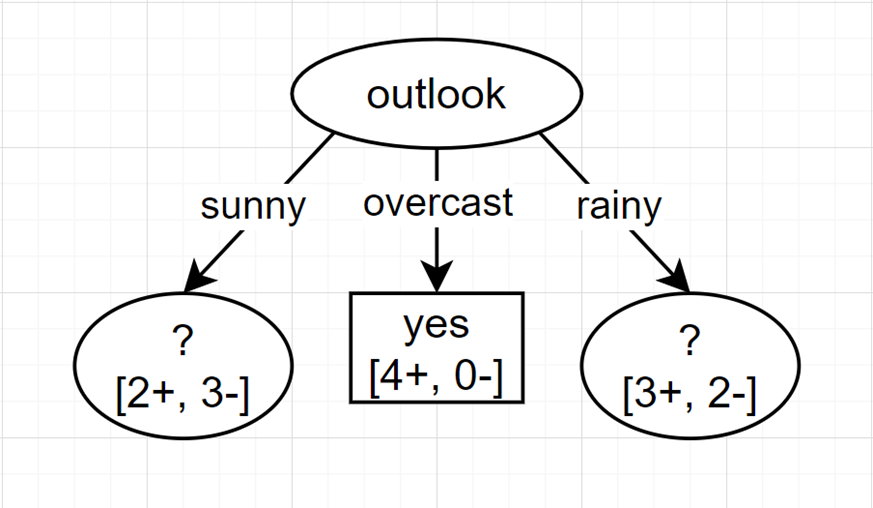

In [ ]:
df_sunny = df.loc[df.outlook=='sunny'].loc[:, df.columns != 'outlook']
df_sunny

,temp,humidity,windy,play
0,hot,high,False,no
1,hot,high,True,no
7,mild,high,False,no
8,cool,normal,False,yes
10,mild,normal,True,yes


In [ ]:
temperature=en_gain(df_sunny, 'temp')
temperature

{'Information Gain': 0.5709505944546688,
 'cool': {'entropy': 0.0, 'yes/no': Counter({'yes': 1})},
 'hot': {'entropy': 0.0, 'yes/no': Counter({'no': 2})},
 'mild': {'entropy': 1.0, 'yes/no': Counter({'no': 1, 'yes': 1})}}

In [ ]:
humidity=en_gain(df_sunny, 'humidity')
humidity

{'Information Gain': 0.9709505944546688,
 'high': {'entropy': 0.0, 'yes/no': Counter({'no': 3})},
 'normal': {'entropy': 0.0, 'yes/no': Counter({'yes': 2})}}

In [ ]:
windy=en_gain(df_sunny, 'windy')
windy

{False: {'entropy': 0.9182958340544894,
  'yes/no': Counter({'no': 2, 'yes': 1})},
 'Information Gain': 0.019973094021975113,
 True: {'entropy': 1.0, 'yes/no': Counter({'no': 1, 'yes': 1})}}

In [ ]:
pd.DataFrame({'attribute':df.columns[1:4], 'Gain': [temperature['Information Gain'], humidity['Information Gain'], windy['Information Gain']]})

,attribute,Gain
0,temp,0.570951
1,humidity,0.970951
2,windy,0.019973


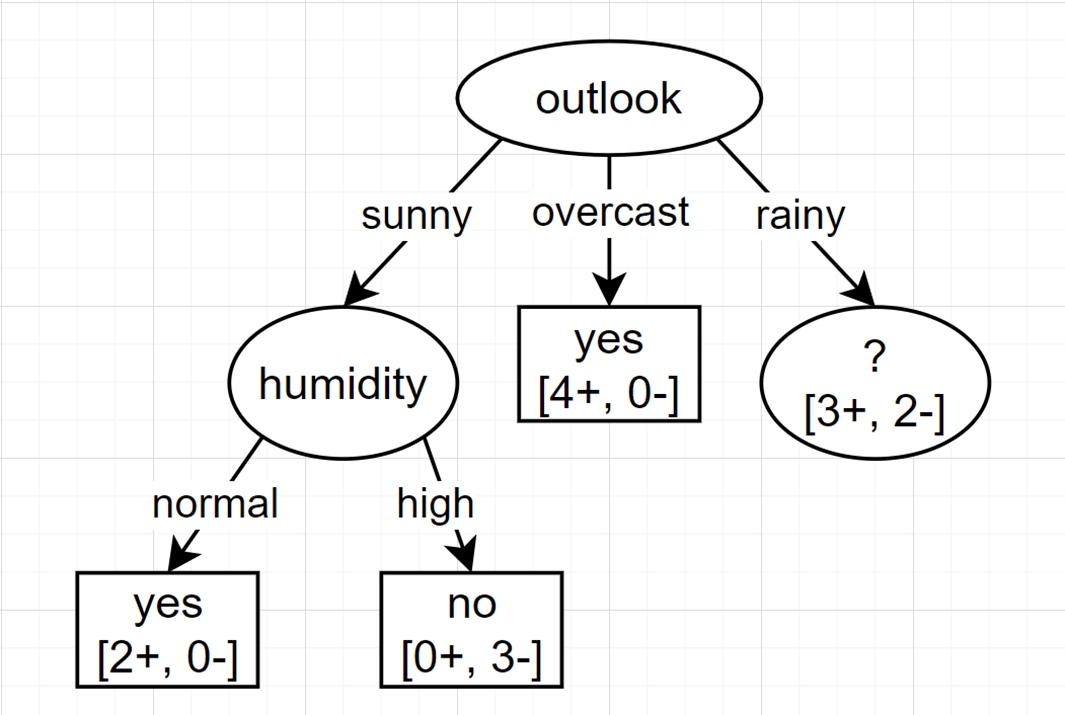

In [ ]:
df_rainy = df.loc[df.outlook=='rainy'].loc[:, df.columns != 'outlook']
df_rainy

,temp,humidity,windy,play
3,mild,high,False,yes
4,cool,normal,False,yes
5,cool,normal,True,no
9,mild,normal,False,yes
13,mild,high,True,no


In [ ]:
temperature=en_gain(df_rainy, 'temp')
temperature

{'Information Gain': 0.019973094021975113,
 'cool': {'entropy': 1.0, 'yes/no': Counter({'no': 1, 'yes': 1})},
 'mild': {'entropy': 0.9182958340544894,
  'yes/no': Counter({'no': 1, 'yes': 2})}}

In [ ]:
humidity=en_gain(df_rainy, 'humidity')
humidity

{'Information Gain': 0.019973094021975113,
 'high': {'entropy': 1.0, 'yes/no': Counter({'no': 1, 'yes': 1})},
 'normal': {'entropy': 0.9182958340544894,
  'yes/no': Counter({'no': 1, 'yes': 2})}}

In [ ]:
windy=en_gain(df_rainy, 'windy')
windy

{False: {'entropy': 0.0, 'yes/no': Counter({'yes': 3})},
 'Information Gain': 0.9709505944546688,
 True: {'entropy': 0.0, 'yes/no': Counter({'no': 2})}}

In [ ]:
pd.DataFrame({'attribute':df.columns[1:4], 'Gain': [temperature['Information Gain'], humidity['Information Gain'], windy['Information Gain']]})

,attribute,Gain
0,temp,0.019973
1,humidity,0.019973
2,windy,0.970951


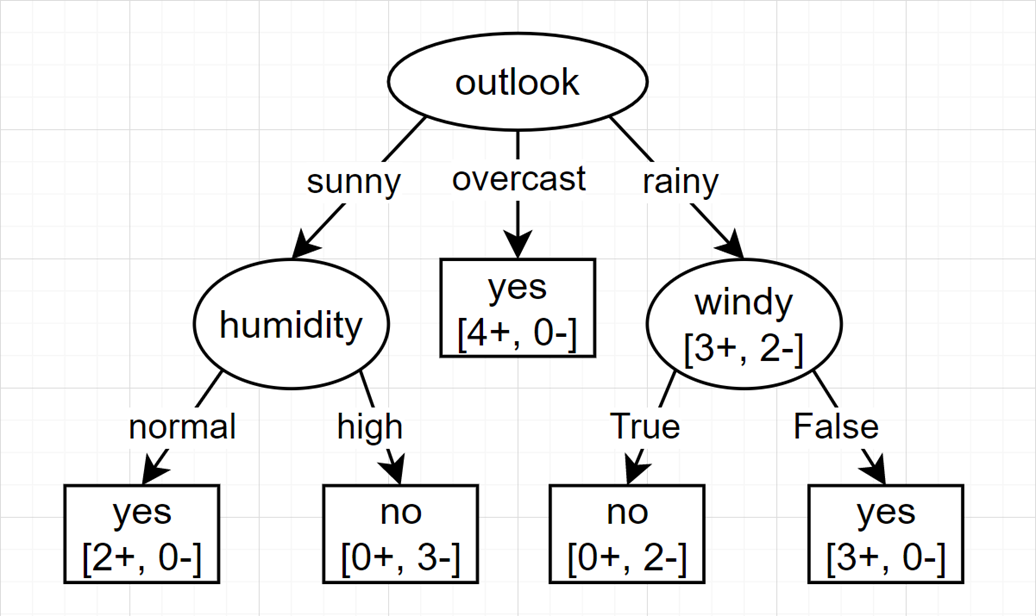

# Model decisionTree

In [ ]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
def convert_hum(txt):
    if 'high' in txt:
        return 1
    else:
        return 0

In [ ]:
def win(txt):
    if 'strong' in txt:
        return 1
    else:
        return 0

In [ ]:
def convert_yes_no(txt):
    if 'yes' in txt:
        return 1
    else:
        return 0

In [ ]:
df.play = df.play.apply(convert_yes_no)
df.humidity = df.humidity.apply(convert_hum)
df.windy = df.windy.apply(win)

In [ ]:
##
df.windy = df.windy.astype(int)
df.play = df.play.apply(convert_yes_no)

In [ ]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,0,0
1,sunny,hot,high,1,0
2,overcast,hot,high,0,1
3,rainy,mild,high,0,1
4,rainy,cool,normal,0,1
5,rainy,cool,normal,1,0
6,overcast,cool,normal,1,1
7,sunny,mild,high,0,0
8,sunny,cool,normal,0,1
9,rainy,mild,normal,0,1


In [ ]:
df = pd.get_dummies(df)
df

,windy,play,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,1,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,0,1,0,0,0,1,1,0
4,0,1,0,1,0,1,0,0,0,1
5,1,0,0,1,0,1,0,0,0,1
6,1,1,1,0,0,1,0,0,0,1
7,0,0,0,0,1,0,0,1,1,0
8,0,1,0,0,1,1,0,0,0,1
9,0,1,0,1,0,0,0,1,0,1


In [ ]:
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
%matplotlib inline

In [ ]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [ ]:
X_train = df.loc[:, df.columns != 'play']
Y_train = df.play

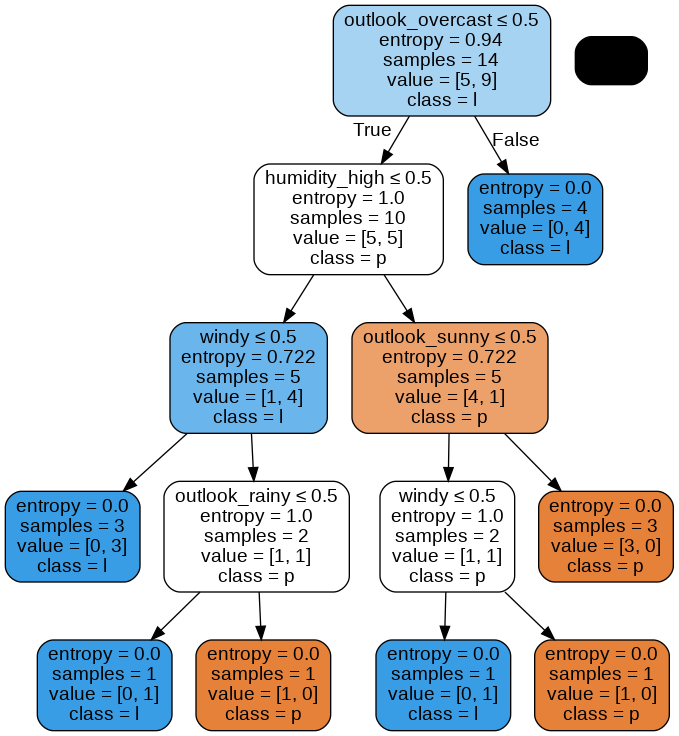

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train,Y_train)
plot_decision_tree(clf, X_train.columns,df.columns[1])